In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv('../Healthcare-Diabetes.csv')
df = df.drop('Id', axis=1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           18                             0.65
BloodPressure                                     125                            4.52
SkinThickness                                     800                            28.90
Insulin                                           1330                           48.05
BMI                                               39                             1.41
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [7]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [8]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     0                              0.00
SkinThickness                                     0                              0.00
Insulin                                           0                              0.00
BMI                                               0                              0.00
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


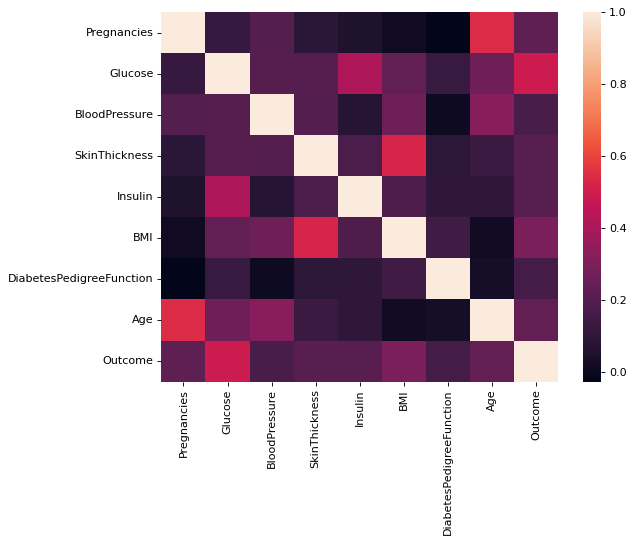

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()

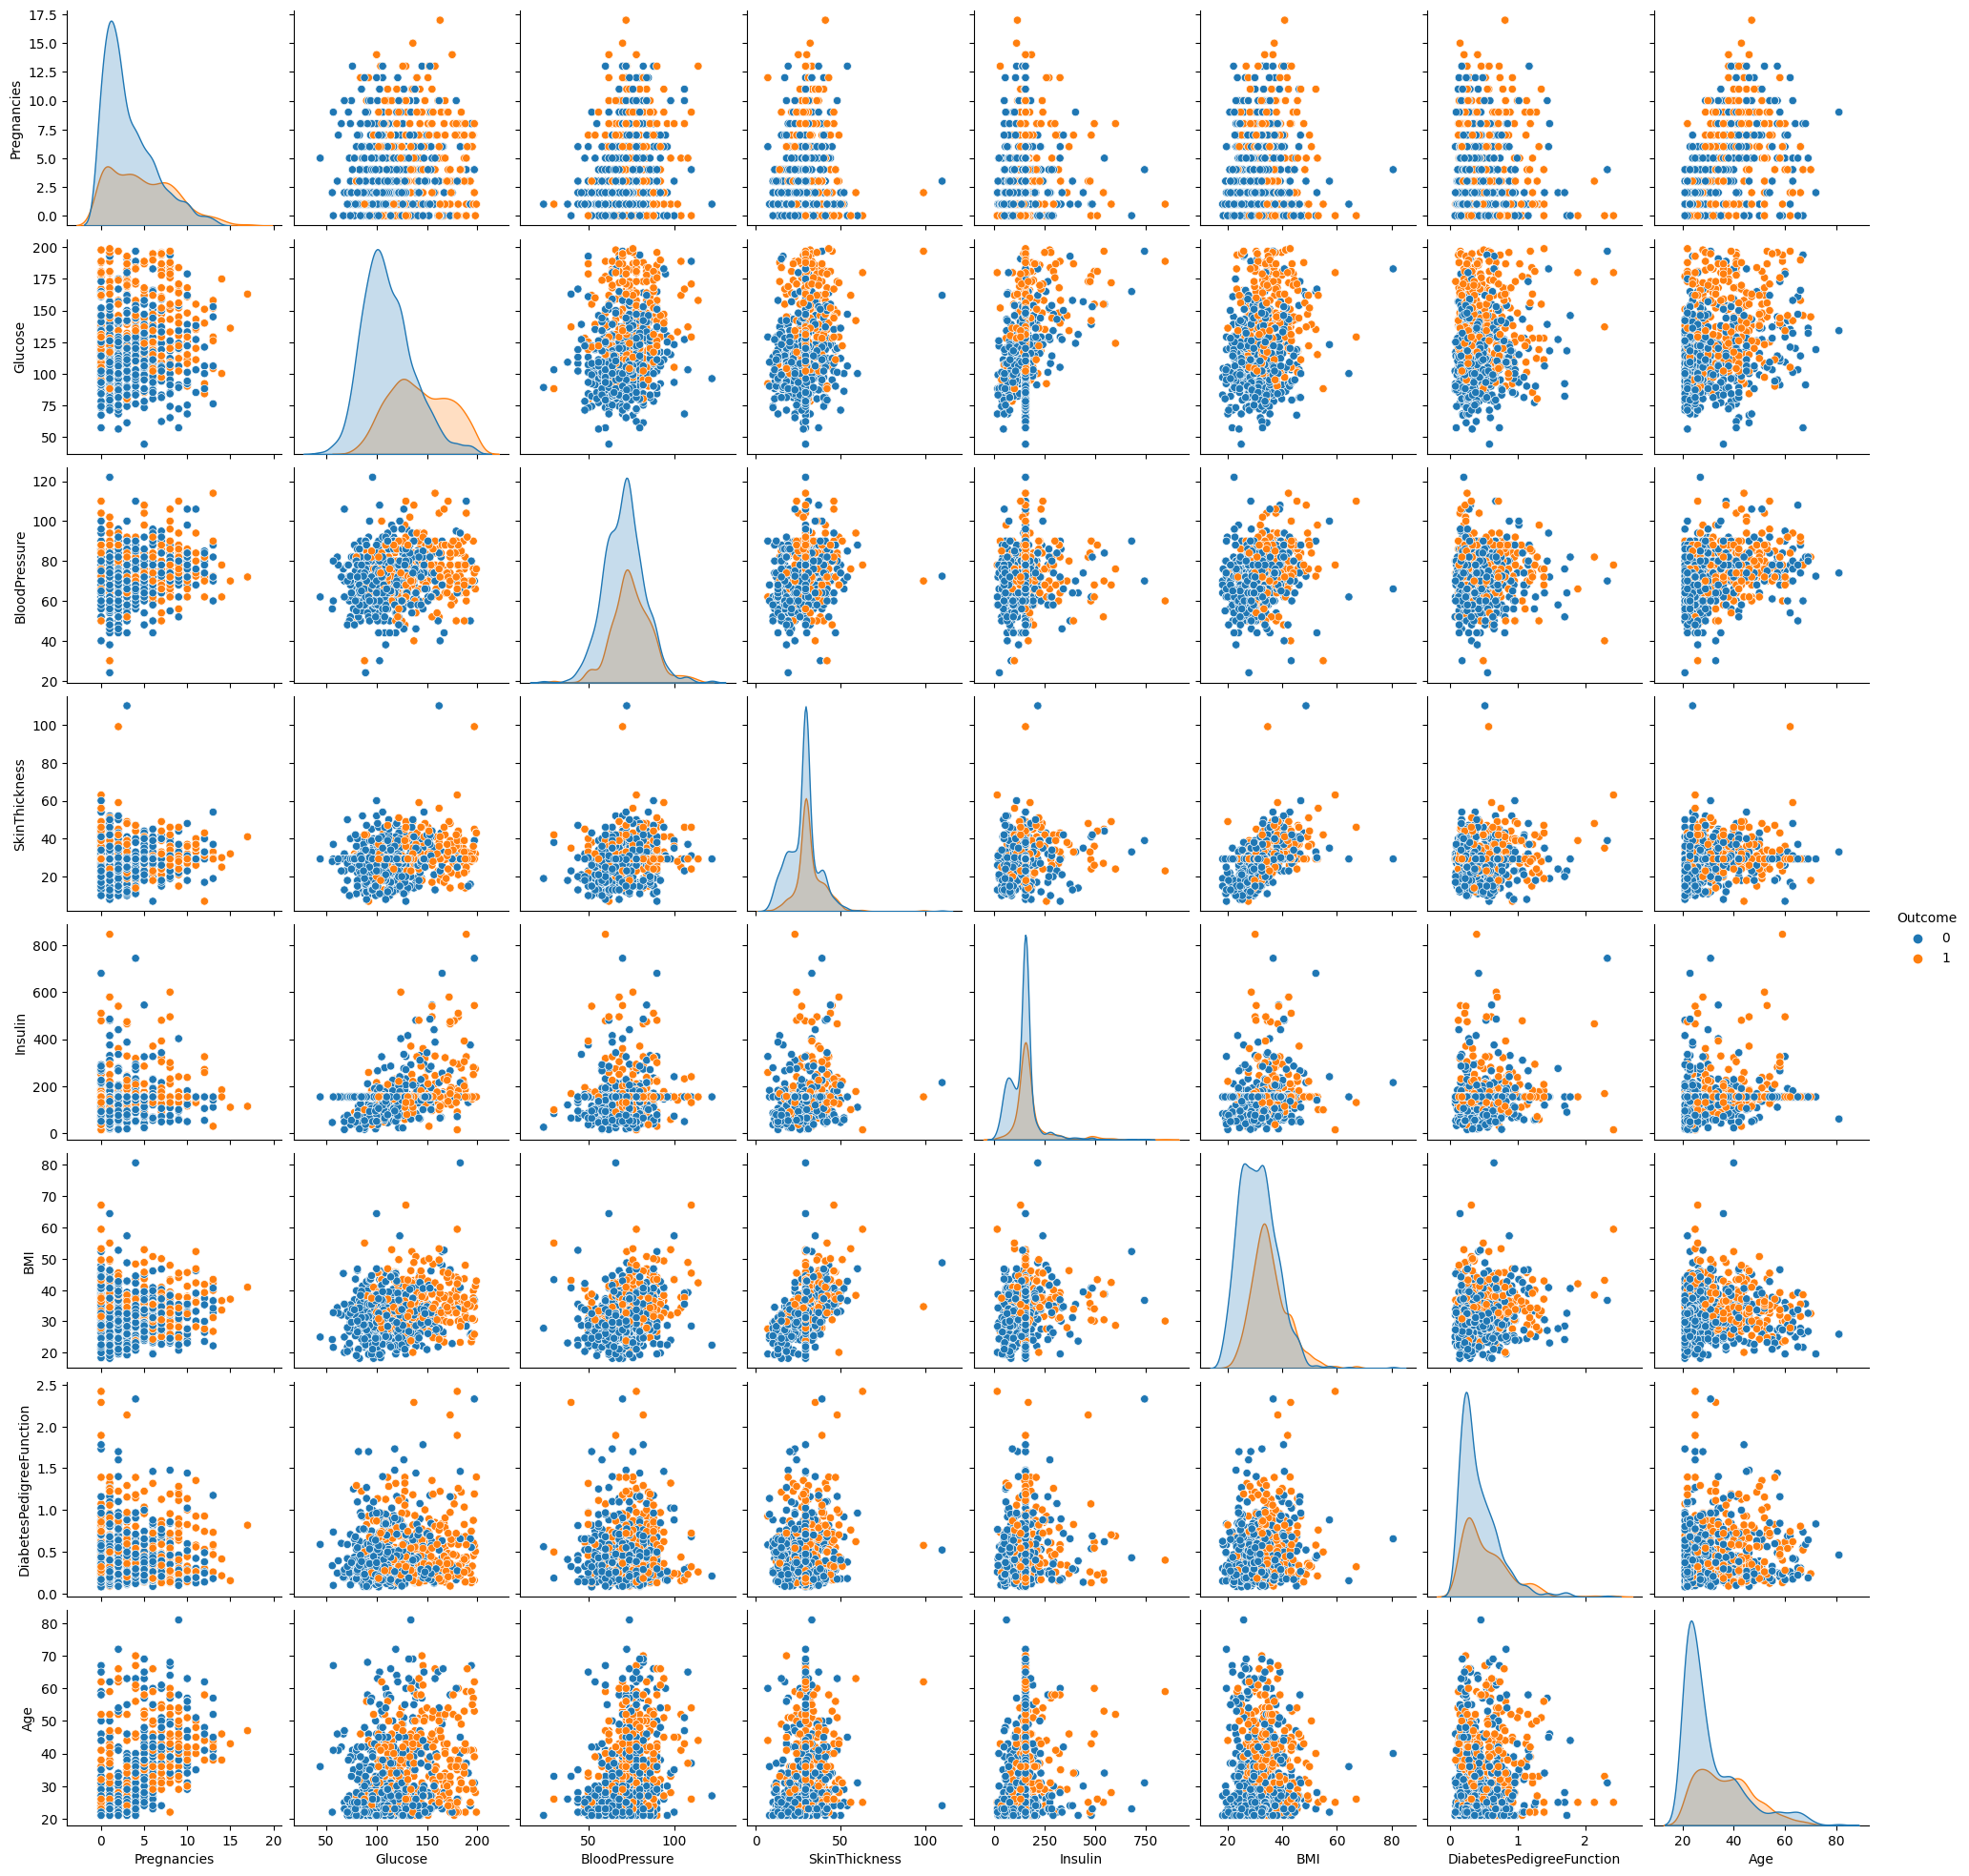

In [10]:
sns.pairplot(df,hue='Outcome')

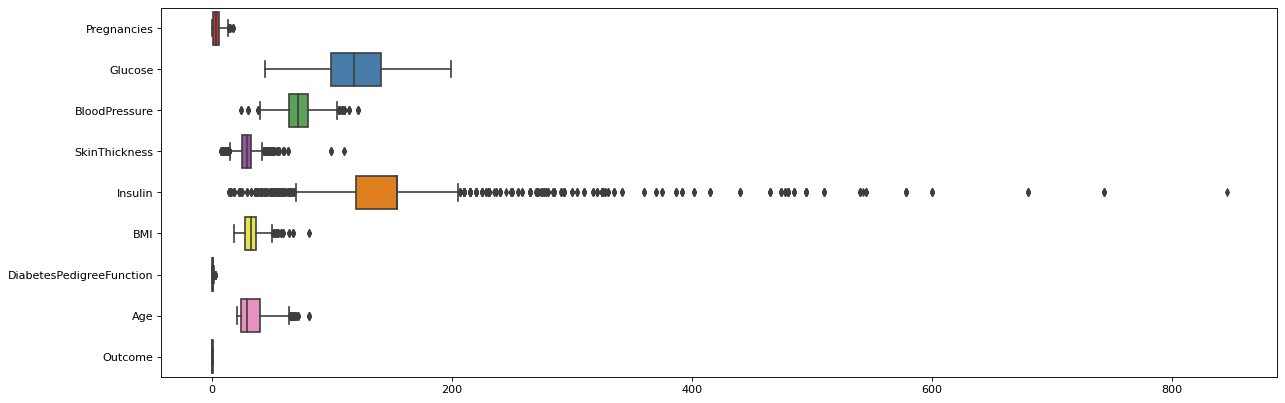

In [11]:
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h",
            palette="Set1")

plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

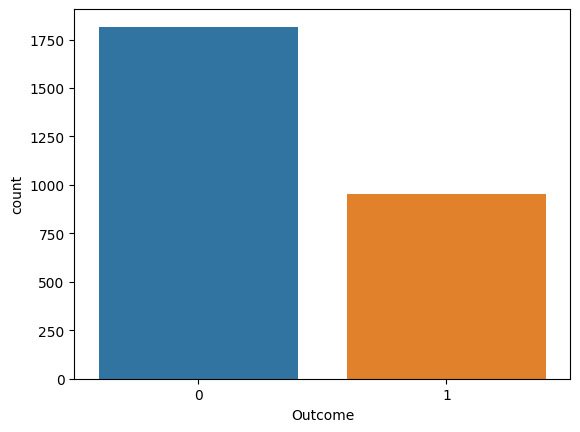

In [12]:
sns.countplot(x="Outcome", data=df)

In [13]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#max_depth=None, min_samples_split=30, n_estimators=200,random_state = 0)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9891696750902527

In [17]:
y_pred=rfc.predict(X_test)

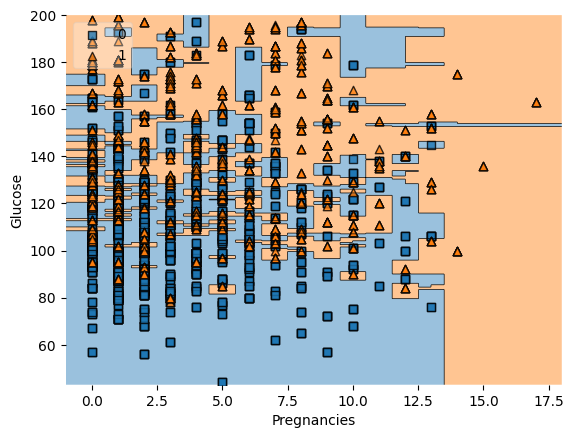

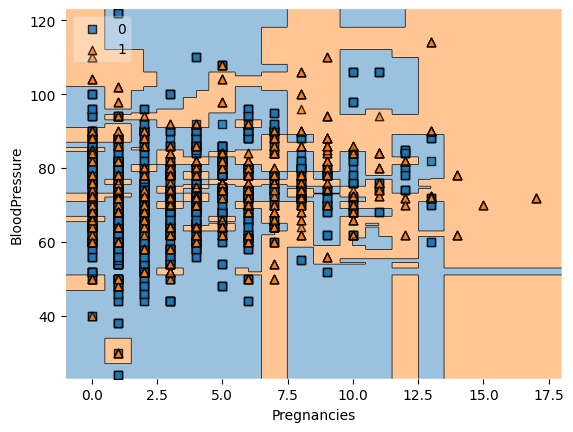

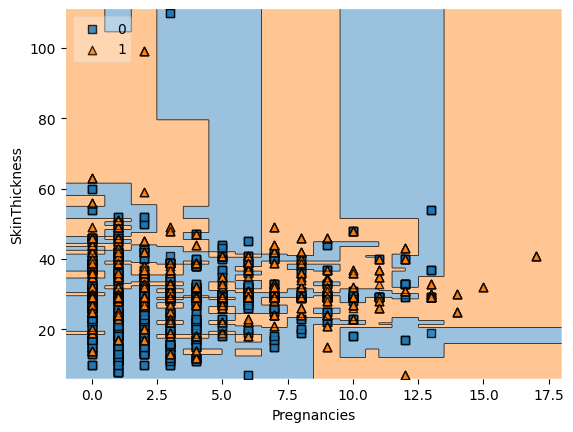

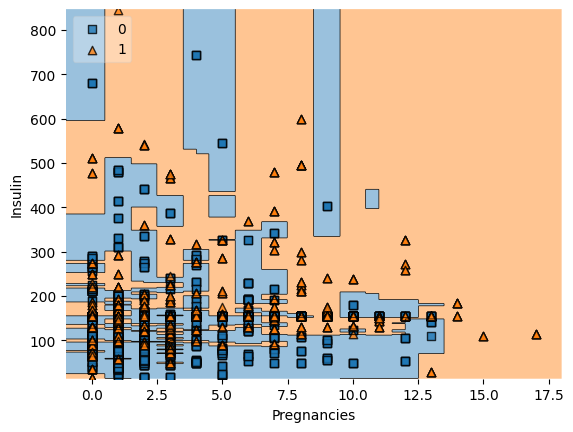

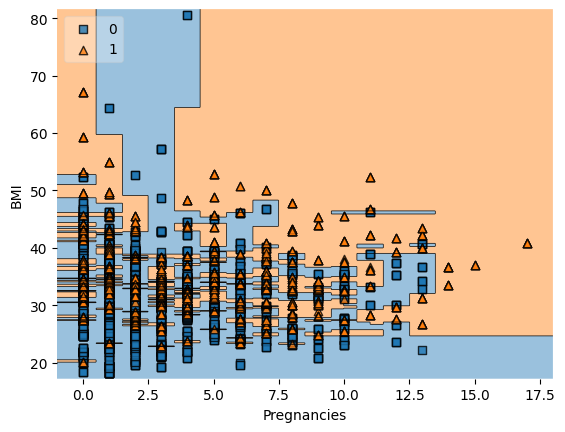

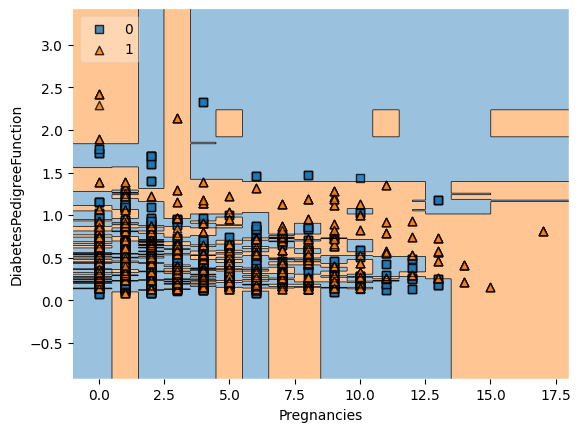

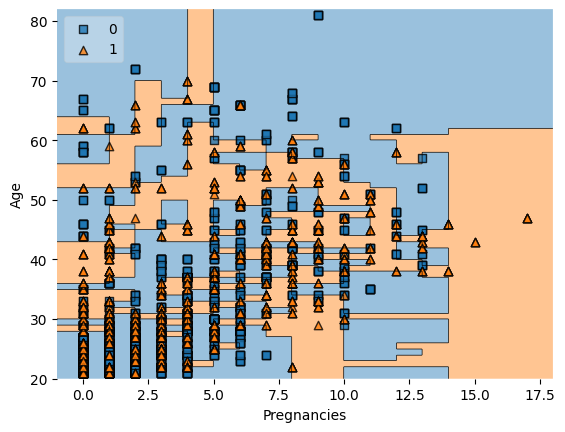

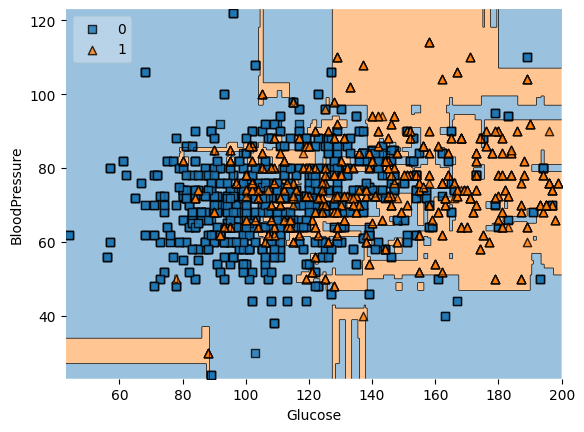

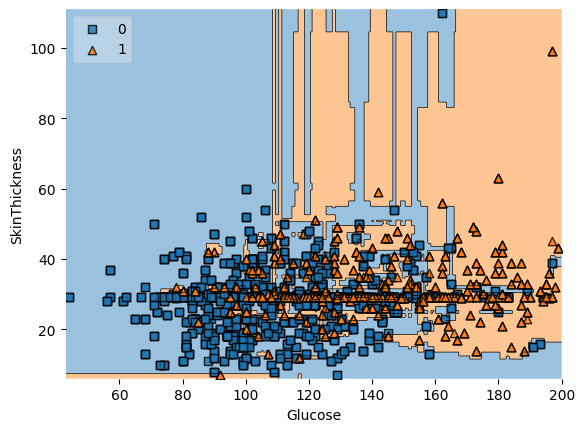

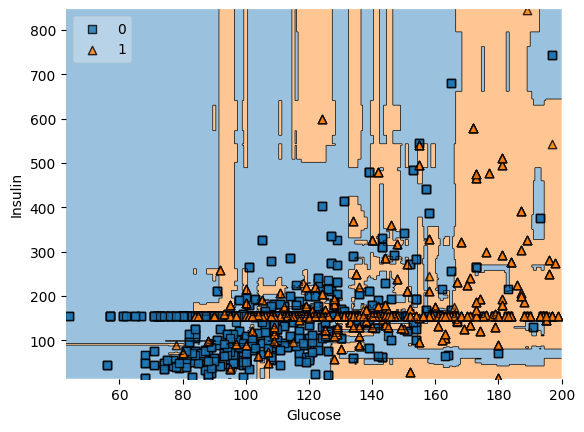

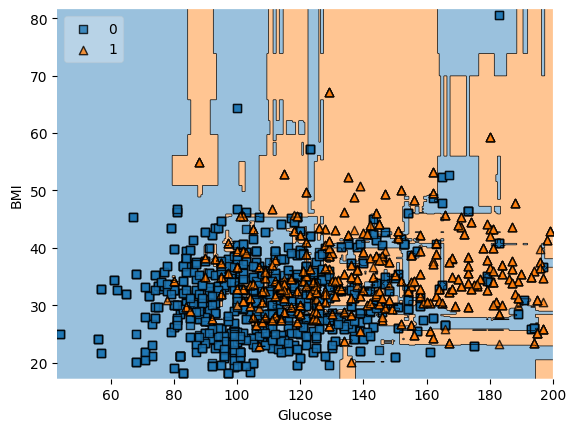

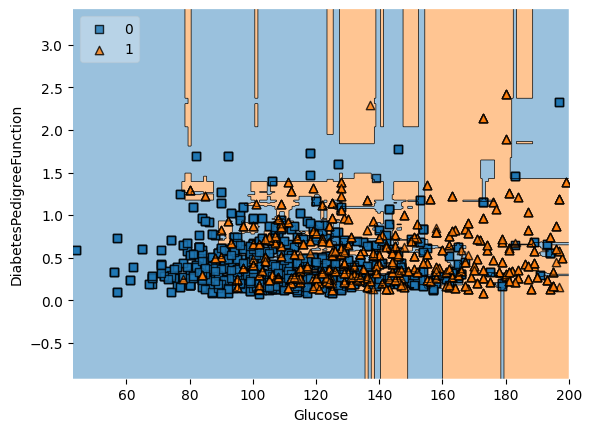

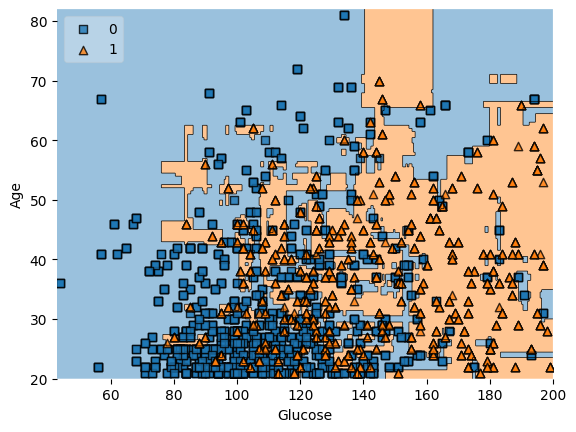

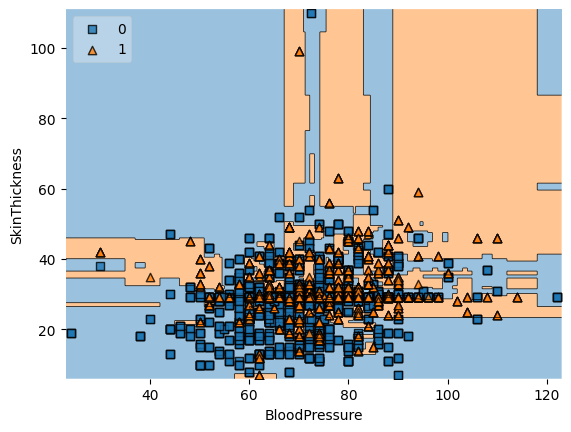

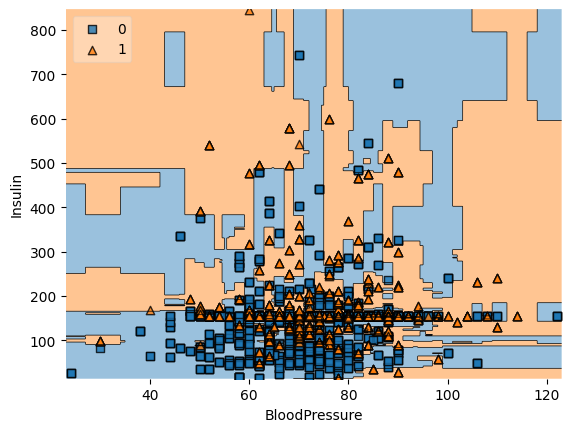

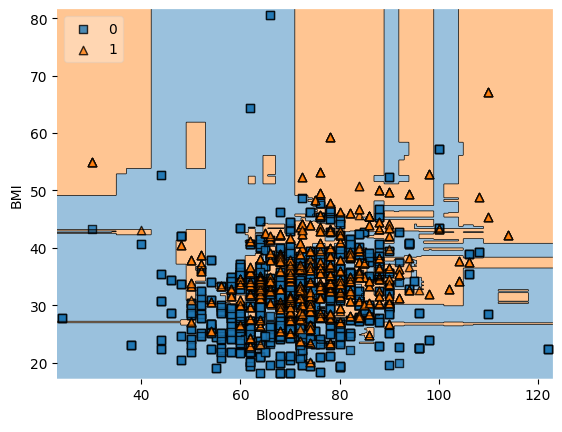

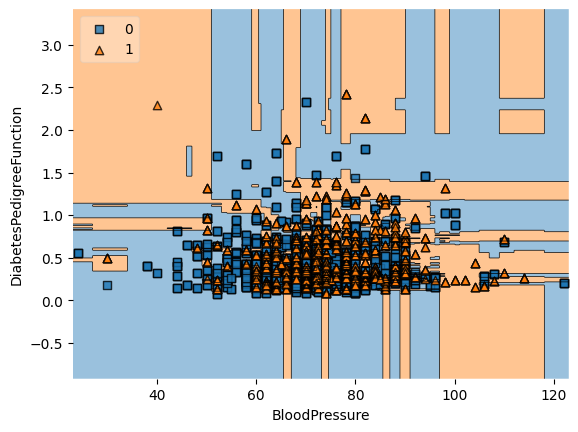

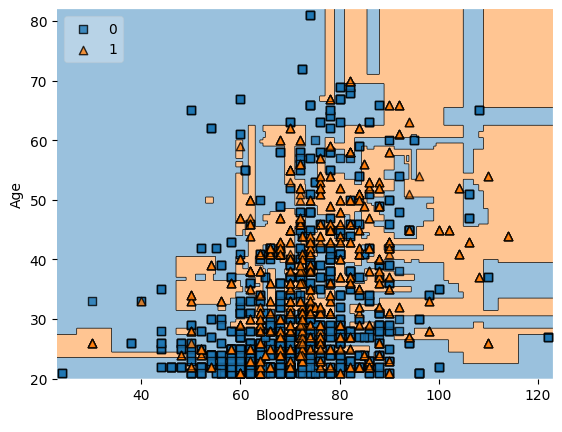

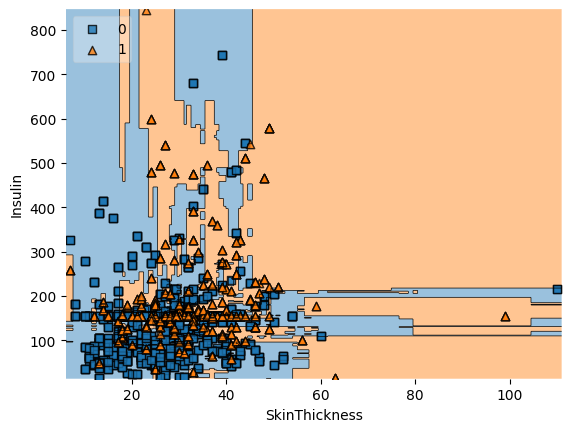

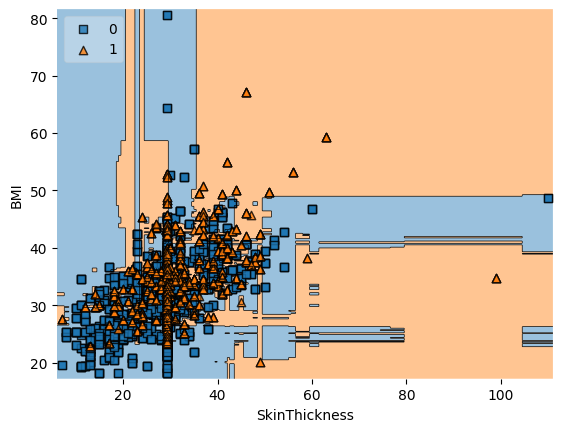

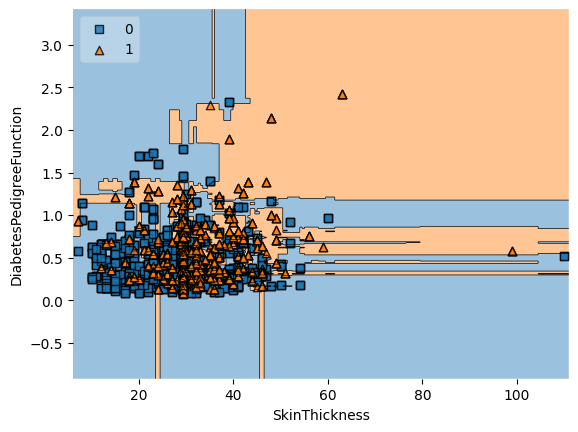

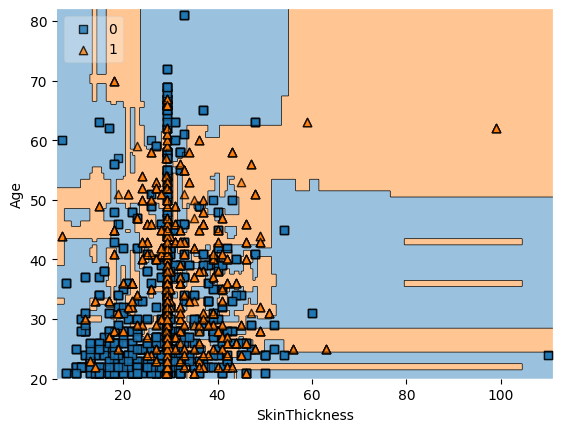

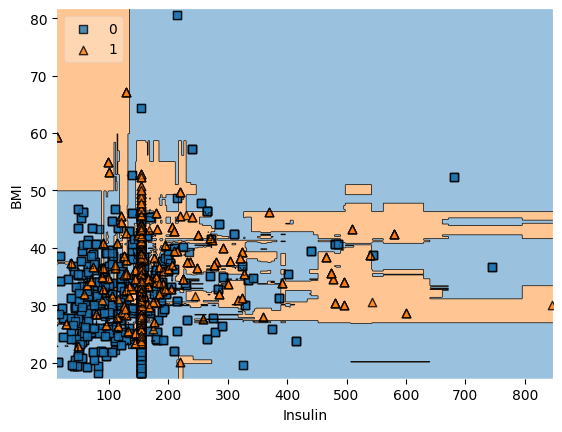

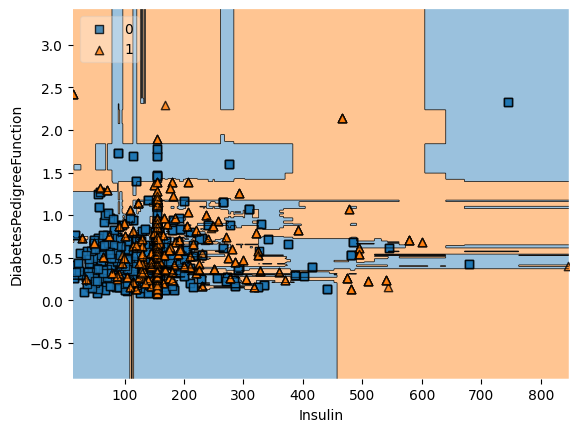

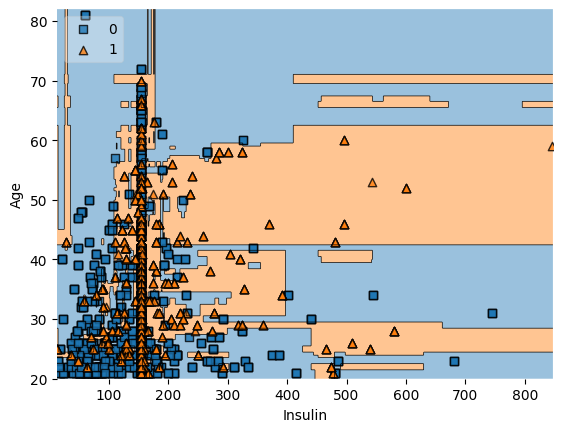

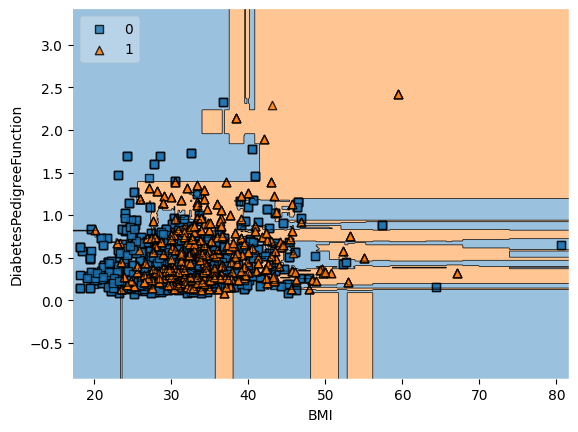

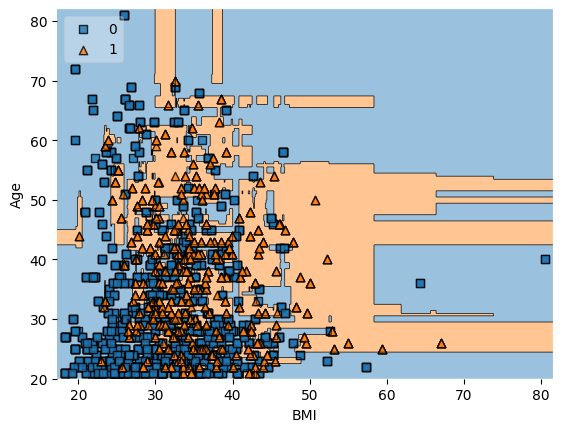

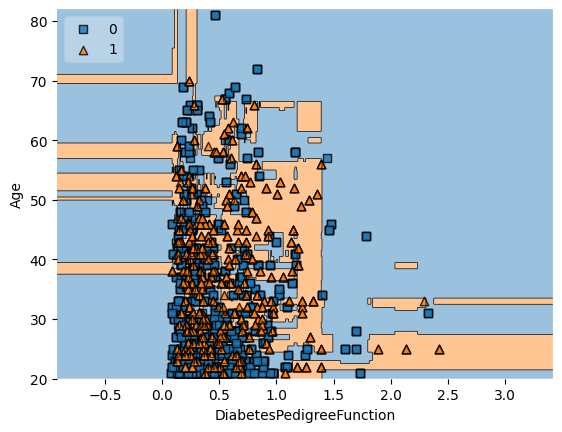

In [18]:
from mlxtend.plotting import plot_decision_regions
def classify_with_rfc(X,Y):
    x = df[[X,Y]].values
    y = df['Outcome'].astype(int).values

    rfc = RandomForestClassifier()
    rfc.fit(x,y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=rfc, legend=2)
    # Adding axes annotations
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()
    
feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):
        classify_with_rfc(feat[i],feat[j])